In [60]:
import scipy.stats as ss
import seaborn as sns

def cramers_corrected_stat(confusion_matrix):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher, 
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))


#The general structure for the code below comes from :
#https://www.kaggle.com/code/chrisbss1/cramer-s-v-correlation-matrix/notebook
rows=[]
for c in cols:
    col=[]
    for d in cols:
        #print(c,d)
        cf = pd.crosstab(shrooms[c], shrooms[d])
        cramers=cramers_corrected_stat(cf)
        #print(round(cramers,2))
        col.append(round(cramers,2))
    rows.append(col)
    
cramers_results = np.array(rows)
cramer_frame = pd.DataFrame(cramers_results, columns = cols, index =cols)
cramer_frame

,edible,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
edible,1.00,0.24,0.20,0.23,0.46,0.97,0.11,0.38,0.54,0.67,...,0.58,0.53,0.51,NaN,0.15,0.21,0.58,0.76,0.50,0.44
cap_shape,0.24,1.00,0.20,0.17,0.25,0.24,0.15,0.07,0.35,0.23,...,0.11,0.21,0.17,NaN,0.22,0.20,0.20,0.25,0.24,0.27
cap_surface,0.20,0.20,1.00,0.22,0.15,0.24,0.20,0.36,0.27,0.25,...,0.18,0.25,0.26,NaN,0.13,0.10,0.22,0.22,0.26,0.25
cap_color,0.23,0.17,0.22,1.00,0.23,0.33,0.25,0.41,0.48,0.28,...,0.31,0.27,0.27,NaN,0.15,0.32,0.54,0.28,0.30,0.33
bruises,0.46,0.25,0.15,0.23,1.00,0.64,0.13,0.33,0.35,0.63,...,0.55,0.47,0.48,NaN,0.13,0.08,0.77,0.57,0.31,0.53
odor,0.97,0.24,0.24,0.33,0.64,1.00,0.28,0.46,0.76,0.39,...,0.52,0.45,0.44,NaN,0.09,0.74,0.69,0.39,0.38,0.37
gill_attachment,0.11,0.15,0.20,0.25,0.13,0.28,1.00,0.08,0.11,0.77,...,0.13,0.97,0.97,NaN,0.94,0.23,0.27,0.81,0.42,0.42
gill_spacing,0.38,0.07,0.36,0.41,0.33,0.46,0.08,1.00,0.13,0.36,...,0.46,0.43,0.40,NaN,0.10,0.21,0.35,0.33,0.70,0.58
gill_size,0.54,0.35,0.27,0.48,0.35,0.76,0.11,0.13,1.00,0.78,...,0.16,0.36,0.33,NaN,0.11,0.19,0.53,0.66,0.53,0.51
gill_color,0.67,0.23,0.25,0.28,0.63,0.39,0.77,0.36,0.78,1.00,...,0.38,0.42,0.42,NaN,0.44,0.46,0.51,0.48,0.43,0.46


<AxesSubplot:>

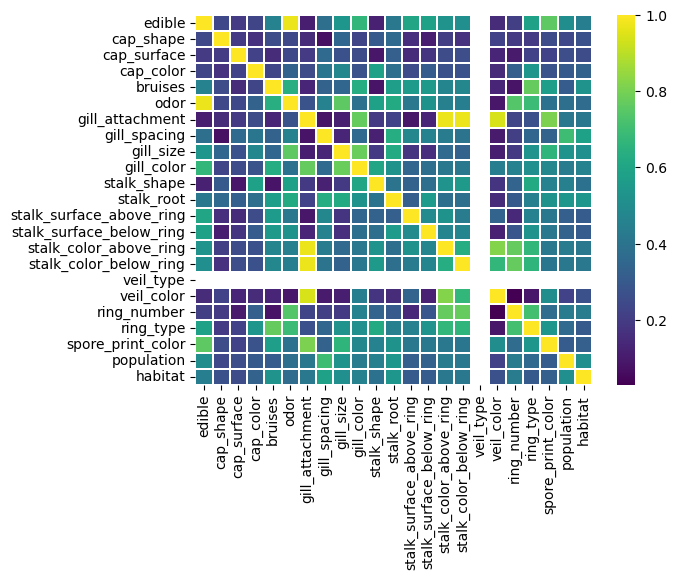

In [56]:
sns.heatmap(cramer_frame, cmap ='viridis', linewidths = 0.30)